In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np
from scipy import stats
from scipy.stats import linregress

In [3]:
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [8]:
#https://www.w3schools.com/python/pandas/pandas_series.asp
#https://towardsdatascience.com/a-practical-introduction-to-pandas-series-9915521cdc69
#https://www.geeksforgeeks.org/python-pandas-series/
sr1 = pd.Series([int(i) for i in range(1880, 2051)])
sr1

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
166    2046
167    2047
168    2048
169    2049
170    2050
Length: 171, dtype: int64

In [20]:
recent_year = df[df['Year'] >= 2000]
recent_year

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [22]:
year_to_2050 = pd.Series([int(i) for i in range(2000, 2051)])
recent_year['Year'].append(year_to_2050, ignore_index = True)
recent_year

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

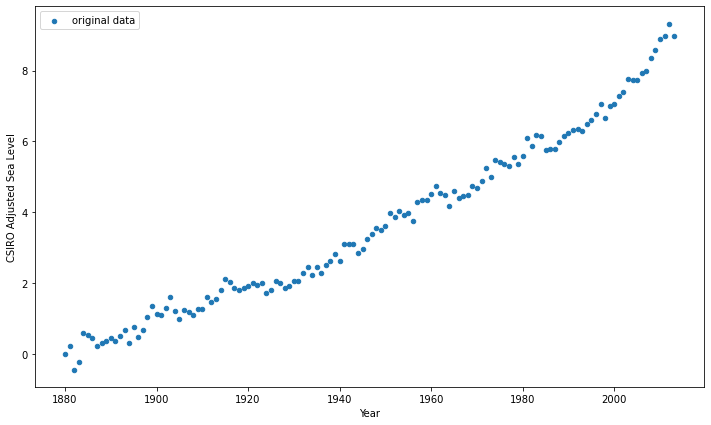

In [23]:
df.plot.scatter('Year', 'CSIRO Adjusted Sea Level', label = 'original data', figsize=(12,7))

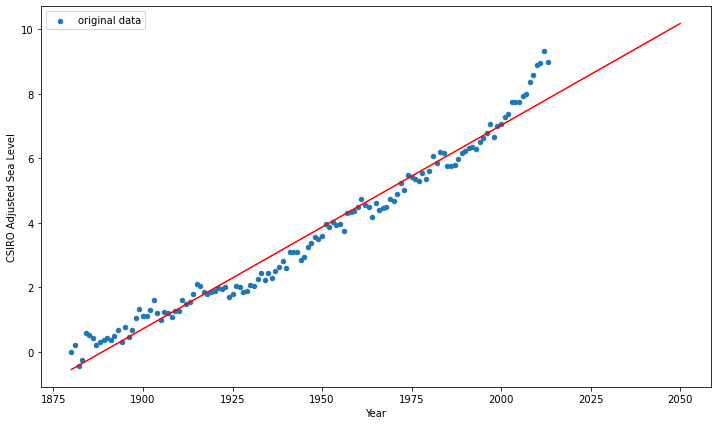

In [29]:
#https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-with-scipy-statsmodels-sklearn-da8e373cc89b
df.plot.scatter('Year', 'CSIRO Adjusted Sea Level', label = 'original data', figsize=(12,7))
year_to_2050 = pd.Series([int(i) for i in range(1880, 2051)])
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.plot(year_to_2050, intercept + slope*year_to_2050, 'r', label='best fit')

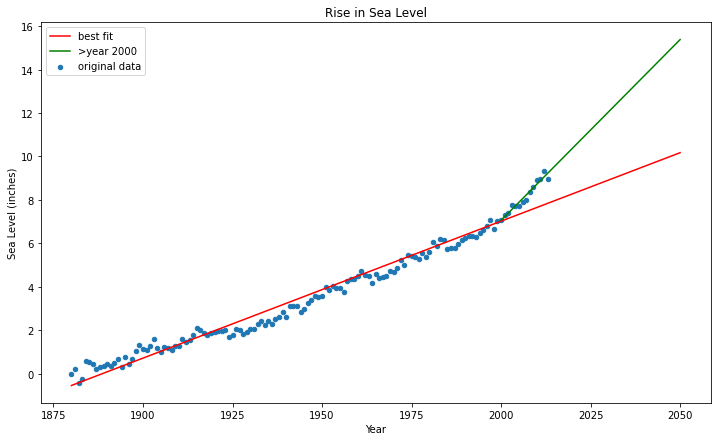

In [32]:
df.plot.scatter('Year', 'CSIRO Adjusted Sea Level', label = 'original data', figsize=(12,7))
year_to_2050 = pd.Series([int(i) for i in range(1880, 2051)])
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.plot(year_to_2050, intercept + slope*year_to_2050, 'r', label='best fit')

recent = df[df['Year']>=2000]
slope_y, intercept_y, r_y, p_y, std_err_y = stats.linregress(recent['Year'],recent['CSIRO Adjusted Sea Level'])
yearto2050_2 = pd.Series([int(i) for i in range(2000, 2051)])
plt.plot(yearto2050_2, intercept_y + slope_y*yearto2050_2, 'g', label='>year 2000')

plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.legend(fontsize="medium")
plt.show()